In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:

import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from IPython.core.display import SVG, display

output_location = "/Users/salabed/workspace/latex_writings/thesis/phd_dissertation/Chapters/BoBn/Figures/mobobn/"
plt.style.use("ggplot")
sns.set_theme(style="ticks", rc={"axes.spines.right": False, "axes.spines.top": False})
sns.set_context("paper")  # , font_scale=1.5, rc={"lines.linewidth": 1.5})
plt.rcParams["svg.fonttype"] = "none"
plt.rcParams["font.family"] = "Arial"
plt.rc("text", usetex=False)
plt.rc("xtick", labelsize="large")
plt.rc("ytick", labelsize="large")
plt.rc("axes", labelsize="large")
plt.rc("pdf", use14corefonts=True)



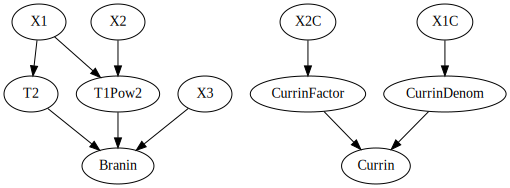

In [59]:
def draw(graph, path = None, better_label: bool = True):

    if better_label:
        for node in graph.nodes():
            graph.nodes[node]['label'] = str(node).replace("_", " ").title().replace(" ", "").replace("Macros",
                                                                                                      "").replace(
                "Micros", "").replace("Iops", "IOPS").replace(".", "").replace("Size", "Sz").replace("Number",
                                                                                                     "Num").replace(
                "Level0", "L0")

    fmt = "svg"
    if path is not None:
        if path.endswith(".svg"):
            fmt = "svg"
        elif path.endswith(".pdf"):
            fmt = "pdf"
        else:
            print("Unrecognized file extension", path.split(".")[-1])
    svg = nx.nx_agraph.to_agraph(graph).draw(path = path, prog = "dot", format = fmt, args = "-Gsize=10")
    if path is None:
        display(SVG(svg))
        
known_dag = nx.DiGraph()
# Branin structure
known_dag.add_edges_from([("x1", "t2"), ("x1", "t1_pow2"), ("x2", "t1_pow2")])
known_dag.add_edges_from([("x3", "branin")])
known_dag.add_edges_from([("t1_pow2", "branin"), ("t2", "branin")])
# Currin structure
known_dag.add_edges_from([("x2c", "currin_factor"), ("x1c", "currin_denom")])
known_dag.add_edges_from([("currin_denom", "currin"), ("currin_factor", "currin")])
draw(known_dag)

In [69]:


known_dag = nx.DiGraph()
# Branin structure
known_dag.add_edges_from([("x1", "t2"), ("x1", "t1_pow2"), ("x2", "t1_pow2")])
known_dag.add_edges_from([("x3", "branin")])
known_dag.add_edges_from([("t1_pow2", "branin"), ("t2", "branin")])
# Currin structure
known_dag.add_edges_from([("x2c", "currin_factor"), ("x1c", "currin_denom")])
known_dag.add_edges_from([("currin_denom", "currin"), ("currin_factor", "currin")])
assert nx.d_separated(known_dag, {"branin"}, {"currin"}, set()) == True 
draw(known_dag, f"{output_location}/two_independent.pdf")

In [68]:
# Check trivial case, if both objectives are absolutely independent


True

In [22]:

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

from autorocks.envs.synthetic.funcs.branin_currin import BraninCur2DParametersSpace
from autorocks.optimizer.bograph.bobn import BoBn

G = known_dag

param_space = BraninCur2DParametersSpace()

bobn_graph = BoBn(G, param_space, {"branin", "currin"})


INFO:root:Creating a subgraph for the group: {'currin_factor', 'currin_denom', 't1_pow2', 'x1', 'x2', 't2'}
INFO:root:Creating a 1 number of d-separable subgraphs.
INFO:root:Independent subgraph {'currin_factor', 'branin', 'currin', 'currin_denom', 't1_pow2', 'x1', 'x2', 't2'}, with a max dimension and node: ('t1_pow2', 2)
INFO:root:Built independent subgraphs, with the largest dimension: 2


p1='x1': p2='x2': union_of_children={'currin_factor', 'currin_denom', 't1_pow2', 't2'}


In [ ]:
from autorocks.optimizer.bograph import bobn_utils


G = nx.DiGraph()
# Branin structure
G.add_edges_from([("x1", "t2"), ("x1", "t1_pow2"), ("x2", "t1_pow2")])
G.add_edges_from([("x3", "branin")])
G.add_edges_from([("t1_pow2", "branin"), ("t2", "branin")])
# Currin structure
G.add_edges_from([("x2", "currin_factor"), ("x1", "currin_denom")])
G.add_edges_from([("currin_denom", "currin"), ("currin_factor", "currin")])
assert nx.d_separated(G, {"branin"}, {"currin"}, set()) == False 

draw(G, f"{output_location}/two_dependent_3var.pdf")

draw(G)
bobn_utils.create_d_separable_subgraphs(G, parameter_nodes= {'x1', 'x2', 'x3'}, objectives = {"branin", "currin"})

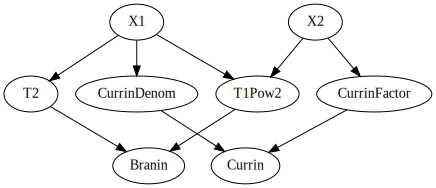

INFO:root:Creating a subgraph for the group: {'currin_factor', 'currin_denom', 't1_pow2', 'x1', 'x2', 't2'}
INFO:root:Creating a 1 number of d-separable subgraphs.


p1='x1': p2='x2': union_of_children={'currin_factor', 'currin_denom', 't1_pow2', 't2'}


[{'branin',
  'currin',
  'currin_denom',
  'currin_factor',
  't1_pow2',
  't2',
  'x1',
  'x2'}]

In [81]:
from autorocks.optimizer.bograph import bobn_utils


G = nx.DiGraph()
# Branin structure
G.add_edges_from([("x1", "t2"), ("x1", "t1_pow2"), ("x2", "t1_pow2")])
# G.add_edges_from([("x3", "branin")])
G.add_edges_from([("t1_pow2", "branin"), ("t2", "branin")])
# Currin structure
G.add_edges_from([("x2", "currin_factor"), ("x1", "currin_denom")])
G.add_edges_from([("currin_denom", "currin"), ("currin_factor", "currin")])
assert nx.d_separated(G, {"branin"}, {"currin"}, set()) == False 

draw(G, f"{output_location}/two_dependent.pdf")

draw(G)
bobn_utils.create_d_separable_subgraphs(G, parameter_nodes= {'x1', 'x2'}, objectives = {"branin", "currin"})

In [78]:
bobn_utils.create_d_separable_subgraphs(G, parameter_nodes= {'x1', 'x2', 'x3'}, objectives = {"branin", "currin"})

INFO:root:Creating a subgraph for the group: {'x3'}
INFO:root:Creating a subgraph for the group: {'currin_factor', 'currin_denom', 't1_pow2', 'x1', 'x2', 't2'}
INFO:root:Creating a 2 number of d-separable subgraphs.


p1='x1': p2='x2': union_of_children={'currin_factor', 'currin_denom', 't1_pow2', 't2'}


[{'branin', 'x3'},
 {'branin',
  'currin',
  'currin_denom',
  'currin_factor',
  't1_pow2',
  't2',
  'x1',
  'x2'}]

In [ ]:
nx.d_separated(G, {"branin", "currin"}, {"currin"})

In [34]:
_subgraph = G.subgraph(bobn_graph._subgraphs[0]._subgraph)
for node in _subgraph.nodes():
    # print(_subgraph.edges[node])
    if _subgraph.out_degree(node) == 0:
        print(node, 'is sink')

branin is sink
currin is sink
